In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import math

gondor_stats = './bench/stats/gondor/scaling.csv'
workstation_stats = './bench/stats/workstation/scaling.csv'

In [56]:
def plot_scaling(file, column, legend, title): 
    # Create a copy
    cols = column[:]
    cols.insert(0, 'size')
    
    data = np.genfromtxt(
        file,
        delimiter=',',
        skip_header=1,
        names=cols
    )
    
    num_entries = len(data['size'])
    
    sizes_str= [f"{int(sz)}x{int(sz)}" for sz in data['size']]
    x = np.arange(num_entries)  # the label locations
    
    spacing = 1 / (num_entries + 2)
    bar_width = spacing
    
    fig = plt.figure()
    fig.set_size_inches(8, 8)

    n = len(column) - (len(column)/2)
    for i, col in enumerate(column):
        plt.bar(x - (n-i-1) * spacing, data[col], bar_width)

    plt.xticks(x, sizes_str)
#     plt.yticks(np.arange(1, 100, 0.5))
    plt.ylim(bottom=0.75)
    plt.legend(legend, title=title, title_fontsize="medium")

    plt.xlabel("Image size", fontsize=16)
    plt.ylabel("Improvement factor", fontsize=16)

## Gondor

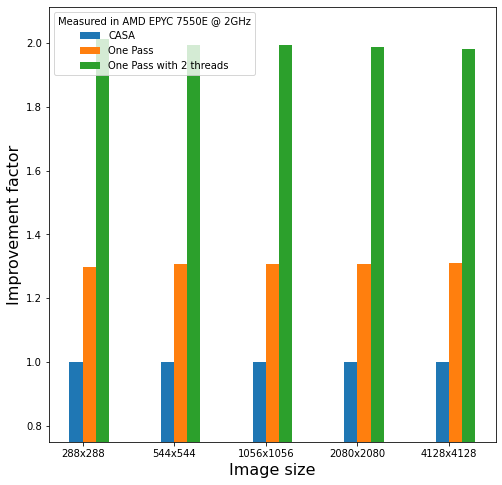

In [57]:
plot_scaling(
    gondor_stats,
    ['casa', 'onepass', 'op_2'],
    legend=["CASA", "One Pass", "One Pass with 2 threads"],
    title="Measured in AMD EPYC 7550E @ 2GHz"
)

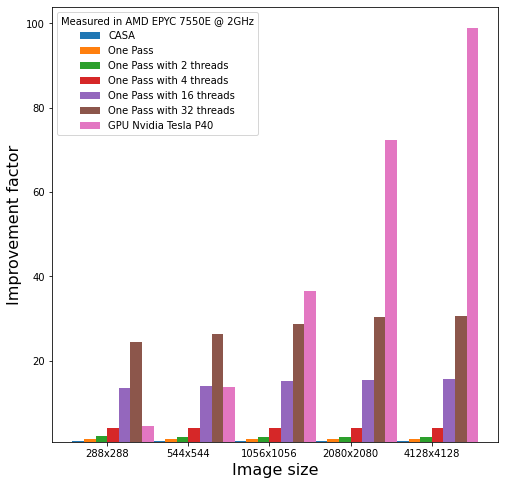

In [58]:
plot_scaling(
    gondor_stats,
    ['casa', 'onepass', 'op_2', 'op_4', 'op_16', 'op_32', 'gpu'],
    legend=["CASA", "One Pass", "One Pass with 2 threads",
     "One Pass with 4 threads", "One Pass with 16 threads", "One Pass with 32 threads",
     "GPU Nvidia Tesla P40"],
    title="Measured in AMD EPYC 7550E @ 2GHz"
)

## Workstation

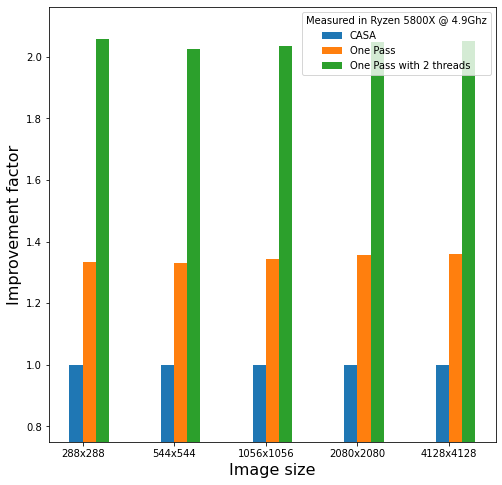

In [60]:
plot_scaling(
    workstation_stats,
    ['casa', 'onepass', 'op_2'],
    legend=["CASA", "One Pass", "One Pass with 2 threads"],
    title="Measured in Ryzen 5800X @ 4.9Ghz"
)

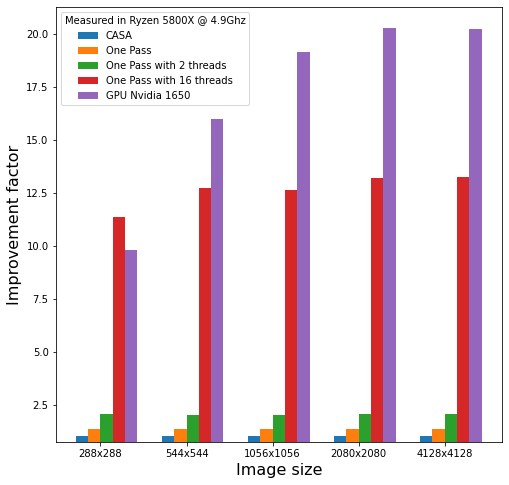

In [61]:
plot_scaling(
    workstation_stats,
    ['casa', 'onepass', 'op_2', 'op_16', 'gpu'],
    legend=["CASA", "One Pass", "One Pass with 2 threads","One Pass with 16 threads","GPU Nvidia 1650"],
    title="Measured in Ryzen 5800X @ 4.9Ghz"
)